<a href="https://colab.research.google.com/github/arpan-sharma/Machine-learning_projects/blob/main/weather_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
# from pandas import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import pipeline,preprocessing,metrics,model_selection,ensemble
from sklearn_pandas import DataFrameMapper


In [ ]:
#read Csv File
weather = pd.read_csv('/content/drive/MyDrive/weather_data/JaipurRawData3.csv',parse_dates=['date'],index_col='date')
weather

,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
date,,,,,,,,,,,,
2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-07,24,2,1014.07,55,5,32,15,8,-6,1017,1011,0.0
2018-03-08,24,1,1014.41,42,7,32,15,5,-5,1017,1011,0.0
2018-03-09,26,3,1014.16,37,8,33,19,6,-1,1017,1009,0.0


In [ ]:
# weather.describe()
weather = weather.drop(['meantempm', 'meandewptm','meanpressurem','maxhumidity','minhumidity','maxdewptm','mindewptm','maxpressurem','minpressurem','precipm','maxtempm'], axis=1)
#plot graph 
# weather.plot()

In [ ]:
weather

,mintempm
date,
2016-05-01,26
2016-05-02,29
2016-05-03,29
2016-05-04,27
2016-05-05,24
...,...
2018-03-07,15
2018-03-08,15
2018-03-09,19


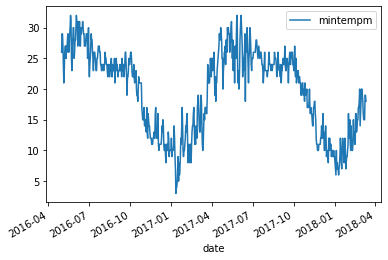

In [ ]:
# plot graph 
weather.plot()

In [ ]:
#Seprate Train Data And Test Data
# from sklearn.model_selection import train_test_split
# train_set, test_set  = train_test_split(weather, train_size=500)
# print(train_set)
# print(test_set)
x = weather
train = x[0:500]
test = x[500:]
predictions = []


In [ ]:
train.describe()


,mintempm
count,500.000000
mean,21.302000
std,6.530244
min,3.000000
25%,16.000000
50%,23.000000
75%,26.000000
max,32.000000


#Autoreggresive Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#train Model 
model_ar = AR(train)
model_ar_fit = model_ar.fit()
# train

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#prediction 
predictions = model_ar_fit.predict(start=500,end=679)
x_blank = []
for x in predictions:
  x_blank.append([round(x)])
predictions = x_blank
# print(x_blank)
# predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
y = []

for x in test.mintempm:
  y.append([x])
test_ch = y
print(predictions)
print(test_ch)


[[23], [23], [23], [24], [24], [24], [23], [24], [24], [24], [24], [24], [23], [23], [24], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [23], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [22], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21

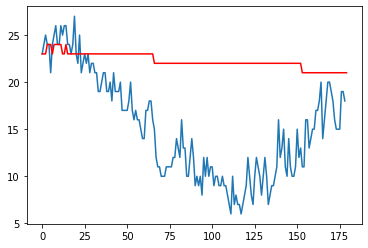

In [ ]:
#plot Test Train Graph 
plt.plot(test_ch) #dataset of test
plt.plot(predictions,color='red')#predicted data